In [4]:
# import params as st
from model_sym import FurutaPendel
from feedforward import *
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tSim = np.linspace(0, 10, 10001)
system = FurutaPendel()

def updateOde():
    global res, uIn

    def sys(t, x, u, params):
        dx = system.calc_dx(t, x, u)

        return dx

    x0 = [0, 0, 0, 0]
    params = st.FurutaParams()
   
    

    res = solve_ivp(sys,
                    [tSim[0], tSim[-1]],
                    x0,
                    t_eval=tSim,
                    args=(uIn,_))

uIn = u_validation
x0 = [0, 0, 1, 0]
t_span = [tSim[0], tSim[-1]]
def simulate_furuta_pendulum(x0, t_span, t_eval):
    # Dynamische Simulation
    solution = solve_ivp(
        lambda t, x: system.calc_dx(t, x, uIn),
        t_span, 
        x0, 
        t_eval=t_eval,
        method="RK45",
        rtol=1e-6,
        atol=1e-9,
        max_step=1e-2
    )
    return solution
res = simulate_furuta_pendulum(x0, t_span, tSim)

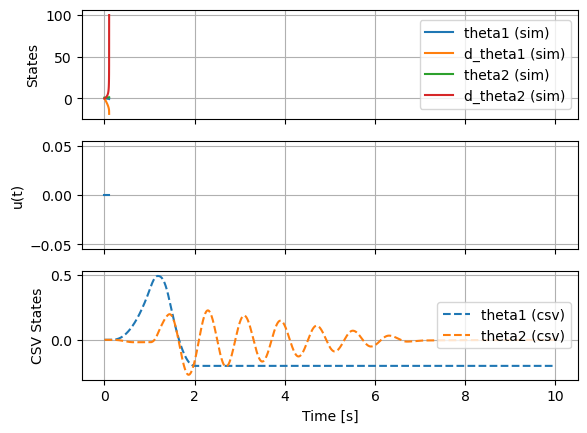

In [5]:


# CSV laden
df = pd.read_csv("validationSimulation.csv")

# Annahme: Spalten heißen z.B. "t", "theta1", "theta2", "u"
t_csv = df["time"].values
theta1_csv = df["F: theta1"].values
theta2_csv = df["F: theta2"].values

u_vals = np.array([uIn(t) for t in res.t])

fig, ax = plt.subplots(3, 1, sharex=True)

# States (Simulation)
ax[0].plot(res.t, res.y[0], label="theta1 (sim)")
ax[0].plot(res.t, res.y[1], label="d_theta1 (sim)")
ax[0].plot(res.t, res.y[2], label="theta2 (sim)")
ax[0].plot(res.t, res.y[3], label="d_theta2 (sim)")
ax[0].set_ylabel("States")
ax[0].legend(loc="center right")
ax[0].grid()

# Input (Simulation)
ax[1].plot(res.t, u_vals)
ax[1].set_ylabel("u(t)")
ax[1].grid()

# CSV-Daten (Validierung / Messung)
ax[2].plot(t_csv, theta1_csv, label="theta1 (csv)", linestyle="--")
ax[2].plot(t_csv, theta2_csv, label="theta2 (csv)", linestyle="--")
ax[2].set_ylabel("CSV States")
ax[2].set_xlabel("Time [s]")
ax[2].legend(loc="center right")
ax[2].grid()

plt.show()



In [6]:

system.x4dotFunc(1, 1, 1,1,1,1,1)

np.float64(34.61273132263337)